<a href="https://colab.research.google.com/github/KaiwalyaZ/Credit-Card-Default/blob/main/Credit_card_default_kaiwalya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

# **INTRODUCTION-**

### Credit risk has traditionally been the greatest risk among all the risks that the banking and credit card industry are facing, and it is usually the one requiring the most capital

### Despite machine learning and big data have been adopted by the banking industry, the current applications used by the banks are mainly focused on credit score predicting. The disadvantage of heavily relying on credit score is banks would miss valuable customers who come from countries that are traditionally underbanked with no credit history or new immigrants who have repaying power but lack credit history. 

### Due to the scope of the project and lack of computational resources, this analysis is not intended to be exhaustive, we only applied 3 classification machine learning models

# **SCOPE OF THE PROJECT-**

### The purpose of this project is to conduct quantitative analysis on credit card default risk by
### applying 3 classification machine learning models.
### machine learning application on default risk itself and the predictor features do not include
### credit score or credit history. Due to the regulatory constraints that banks are facing, for
### example, The Fair Credit Reporting Act (FCRA), the algorithms used in this analysis are
### relatively simple and interpretable.


# <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# Data Prepping<br>

###**Mount A Drive-**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the libraries** 

In [2]:
#Importing libraries for Exploratory data Analysis
import numpy as np # For some math operations on arrays in predictions.
import pandas as pd # To upload the large data set and wrangling the data.
import seaborn as sns  # Used for visualization of dataset.
import matplotlib.pyplot as plt # Used for visualization of dataset.
from scipy import stats

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as tts

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.formula.api import glm
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
sns.set()
pd.options.display.max_columns = None

installing some upgrade to read xls file.

In [4]:
pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96 kB 2.2 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


In [5]:
# Loading Data set of xls file
cc_df = pd.read_excel(r'/content/drive/MyDrive/Credit card Github/default of credit card clients (1).xls',header=1)

## **First five values of given dataset**

In [6]:
# Checking the first five rows
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
cc_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [8]:
# Simplifying column names and bringing consistency
cc_df.rename(
    columns={"PAY_0": "PAY_1", "default payment next month": "DEFAULT"}, inplace=True
)
cc_df.columns = [name.lower() for name in list(cc_df.columns)]

Even though the data description said that the minimum value of `pay_i`'s was -1, all of them have a minimum value of -2. Also `marriage` has a minimum value of 0 but the description said the minimum value is 1. And `education` has a maximum value of 6 while it was supposed to have a maximum value of 4. I'll take a closer look later.

I notice that some of the `bill_amti`'s are negative. Although surprising, it is not uncommon to have a negative balance because of merchant refunds or overpayments. The values are a bit on the higher side and I'll take another look later.

# **Understanding The data**

## **Some Basic Information about Data set-**

In [9]:
# Checking the data types
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   limit_bal  30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   marriage   30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_1      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  bill_amt1  30000 non-null  int64
 13  bill_amt2  30000 non-null  int64
 14  bill_amt3  30000 non-null  int64
 15  bill_amt4  30000 non-null  int64
 16  bill_amt5  30000 non-null  int64
 17  bill_amt6  30000 non-null  int64
 18  pay_amt1   30000 non-null  int64
 19  pay_amt2   30000 non-null  int64
 20  pay_amt3   30000 non-null  int64
 21  pay_amt4   3

In [10]:
# To observe the column variables length,type and shape.
list(cc_df.columns)

['id',
 'limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_1',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'bill_amt2',
 'bill_amt3',
 'bill_amt4',
 'bill_amt5',
 'bill_amt6',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default']

In [11]:
cc_df.shape

(30000, 25)

**Comment:-**
There are Total 30000 observations in the dataset

containing 25 columns

# **Checking the Null values for cleaning the Dataset for further analysis.**

In [12]:
# Checking for missing values
cc_df.isna().sum()

id           0
limit_bal    0
sex          0
education    0
marriage     0
age          0
pay_1        0
pay_2        0
pay_3        0
pay_4        0
pay_5        0
pay_6        0
bill_amt1    0
bill_amt2    0
bill_amt3    0
bill_amt4    0
bill_amt5    0
bill_amt6    0
pay_amt1     0
pay_amt2     0
pay_amt3     0
pay_amt4     0
pay_amt5     0
pay_amt6     0
default      0
dtype: int64

The `id` entries are unique for every row and seem to serve the purpose of a serial number. I will drop that variable.

In [13]:
# Checking the range of the numerical entries
cc_df.describe(
    include="all"
).transpose()  # the transpose view makes it more reader-friendly

,count,mean,std,min,25%,50%,75%,max
id,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
pay_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


# **Exploratory Data Analysis**

Even though the data description said that the minimum value of `pay_i`'s was -1, all of them have a minimum value of -2. Also `marriage` has a minimum value of 0 but the description said the minimum value is 1. And `education` has a maximum value of 6 while it was supposed to have a maximum value of 4. I'll take a closer look later.

I notice that some of the `bill_amti`'s are negative. Although surprising, it is not uncommon to have a negative balance because of merchant refunds or overpayments. The values are a bit on the higher side and I'll take another look later.

Text(0.5, 1.0, 'Distribution of defaulters vs non-defaulters')

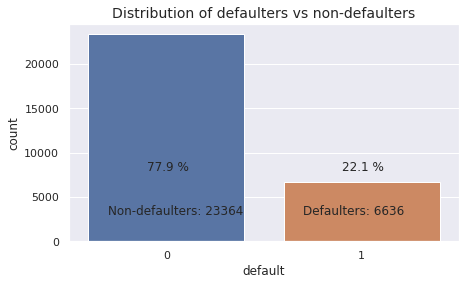

In [14]:
# The frequency of defaults
defs = cc_df["default"].sum()
non_defs = len(cc_df) - defs

# Percentage
def_perc = round(defs / len(cc_df) * 100, 1)
non_def_perc = round(non_defs / len(cc_df) * 100, 1)

# import sys
plt.figure(figsize=(7, 4))
sns.countplot("default", data=cc_df)
plt.annotate(
    "Non-defaulters: {}".format(non_defs),
    xy=(-0.3, 15000),
    xytext=(-0.3, 3000),
    size=12,
)
plt.annotate(
    "Defaulters: {}".format(defs), xy=(0.7, 15000), xytext=(0.7, 3000), size=12
)
plt.annotate(str(non_def_perc) + " %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(def_perc) + " %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title("Distribution of defaulters vs non-defaulters", size=14)

## The relationship Between the Variables and Default<br>

I will study the relationship between the features and credit card default. Although this is not definitive, it will give me a good understanding of the data. This will also help me make decisions about some of the features having values different than what was provided in the data description.

In [15]:
def compare_default_across_features(df, col_name, dict_label={}):
    """
    This function quantifies and displays the distribution of default across the various classes of a feature.
    
    INPUT:
    - df - (pd.DataFrame) the dataframe
    - col_name - (str) the column name of the feature being considered
    - dict_label - (dictionary) a dictionary relating the values of the column to what they represent
    
    OUTPUT:
    - Displays a bar plot showing the population distribution by feature values
    - Displays and returns a cross-tab showing the rate of default across each feature value
    - Displays a bar plot showing the population distribution and default by the feature values 
    """

    # Create a cross-tab and rename indices for readability
    cross_tab = pd.crosstab(df["default"], df[col_name], margins=True, normalize=False)

    new_index = {0: "Non-default proportion", 1: "Default proportion"}
    new_columns = dict_label

    cross_tab.rename(index=new_index, columns=new_columns, inplace=True)

    # Plot a bar graph showing population distribution by the feature values
    plt.figure(figsize=(10, 5))
    i = cross_tab.shape[1] - 1
    cross_tab.loc["All"][0:i].plot.bar(rot=30, fontsize=14)
    plt.title("Population Distribution by " + col_name, fontsize=20)
    plt.ylabel("count")
    plt.show()

    # Normalise the cross-tab and print it
    cross_tab_norm = cross_tab / cross_tab.loc["All"]
    display(cross_tab_norm)

    # Plot a bar graph showing population distribution by the feature values separating the defaulters and non-defaulters
    plt.figure(figsize=(10, 5))
    ax = sns.countplot(x=col_name, hue="default", data=df)
    plt.title("Population Distribution by " + col_name + " with default and non-default",fontsize=20,)

    # Return the normalised cross-tab
    return cross_tab_norm

### **Is default proportion affected by gender?**

<Figure size 720x360 with 0 Axes>

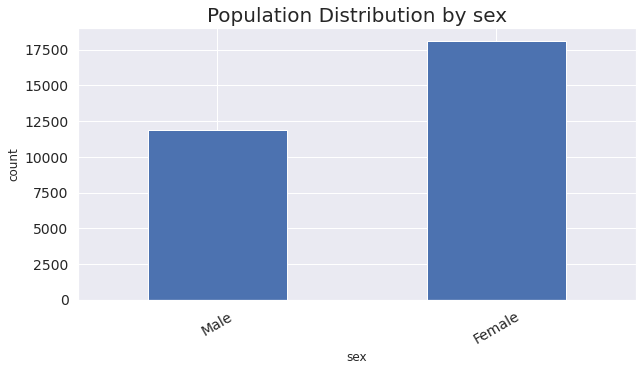

sex,Male,Female,All
default,,,
Non-default proportion,0.758328,0.792237,0.7788
Default proportion,0.241672,0.207763,0.2212
All,1.000000,1.000000,1.0000


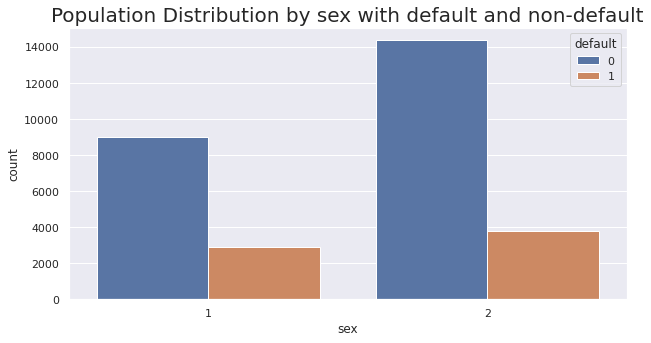

In [16]:
plt.figure(figsize=(10, 5))
_= compare_default_across_features(cc_df, 'sex', {1: "Male", 2: "Female"})

**Comment**
Although there are more female credit card holders, the default proportion among men is higher. I will do a hypothesis test to see if the difference is statistically significant.

### **Is default proportion affected by marital status?**

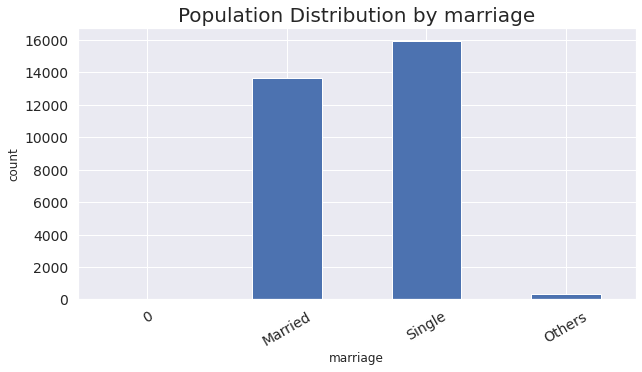

marriage,0,Married,Single,Others,All
default,,,,,
Non-default proportion,0.907407,0.765283,0.790717,0.739938,0.7788
Default proportion,0.092593,0.234717,0.209283,0.260062,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.0000


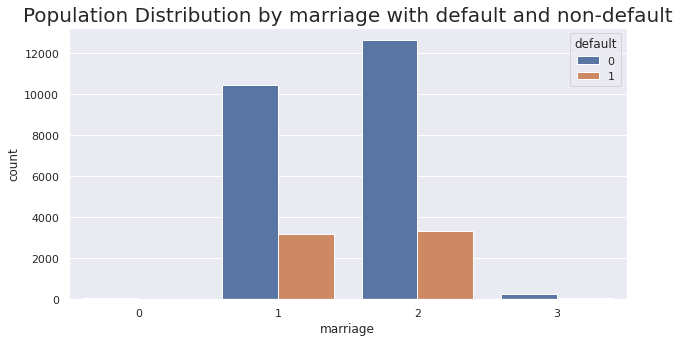

In [17]:
_ = compare_default_across_features(cc_df, 'marriage', {0:'0', 1:'Married', 2:'Single', 3:'Others'})

**Comments**
* Married people have higher default proportions than single folks. While there are intuitive arguments for and against it, closer inspection is needed. For example, is there a difference between married men and married women?
* Also, I notice that there is a marriage category with value 0. 
* Like earlier, since there is an `Others` category, I will cluster these points with that category. (This is done a bit later.)

### **Is the proportion of defaults correlated with age?**

Since age is a discrete variable, I have to figure out a way to bin the values. There are several ways to do this (including using the frequency and quantiles) but I will choose a simpler and more intuitive way by rounding their age to the lowest multiple of 10.

In [18]:
# Creating the age bins
cc_df['age_group'] = cc_df['age']//10
age_group_names = [str(i) + '0s' for i in range(2,8)]
age_dict = dict(zip(range(2,8), age_group_names))
#cc_df['age_bin'] = pd.cut(X['age'], 6, labels=age_group_names)

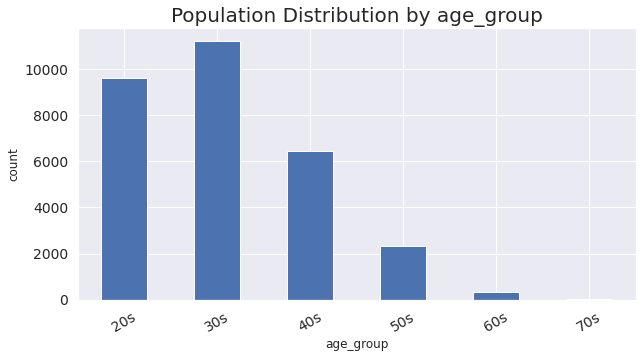

age_group,20s,30s,40s,50s,60s,70s,All
default,,,,,,,
Non-default proportion,0.771574,0.797473,0.770266,0.751388,0.716561,0.72,0.7788
Default proportion,0.228426,0.202527,0.229734,0.248612,0.283439,0.28,0.2212
All,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0000


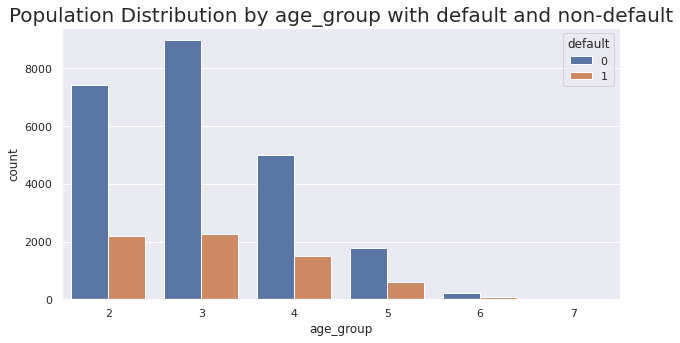

In [19]:
age_cross_tab = compare_default_across_features(cc_df, 'age_group', age_dict)

**Comment:-**
Although there is no monotonic trend in the default rate, there is some change. I look closer into the numeric values.

### **Substituting the values**

In [20]:
def substitute_values(df, col, old_vals, new_val):
    '''
    Substitute certain values of a specific column in a dataframe.
    '''
    df[col] = np.where(df[col].isin(old_vals), new_val, df[col])

I reassign the values of `pay_i`'s, `education` and `marriage` discussed earlier.

In [21]:
for col in ['pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']:
    substitute_values(cc_df, col, [-2, -1, 0], 0)
    
substitute_values(cc_df, 'education', [0, 5, 6], 4)

substitute_values(cc_df, 'marriage', [0], 3)

A quick look at the negative bill amounts; their number and their default proportion.

In [22]:
for col in ['bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6']:
    print(cc_df[cc_df[col]<0].shape)

(590, 26)
(669, 26)
(655, 26)
(675, 26)
(655, 26)
(688, 26)


In [23]:
print(cc_df[cc_df['bill_amt1']<0]['default'].value_counts(normalize=True))
cc_df[
    (cc_df["bill_amt1"] < 0)
    & (cc_df["bill_amt2"] < 0)
    & (cc_df["bill_amt3"] < 0)
    & (cc_df["bill_amt4"] < 0)
    & (cc_df['bill_amt5'] < 0)
    & (cc_df['bill_amt6'] < 0)
]["default"].value_counts(normalize=True)

0    0.815254
1    0.184746
Name: default, dtype: float64


0    0.704545
1    0.295455
Name: default, dtype: float64

### **Correlation Between the Variables**

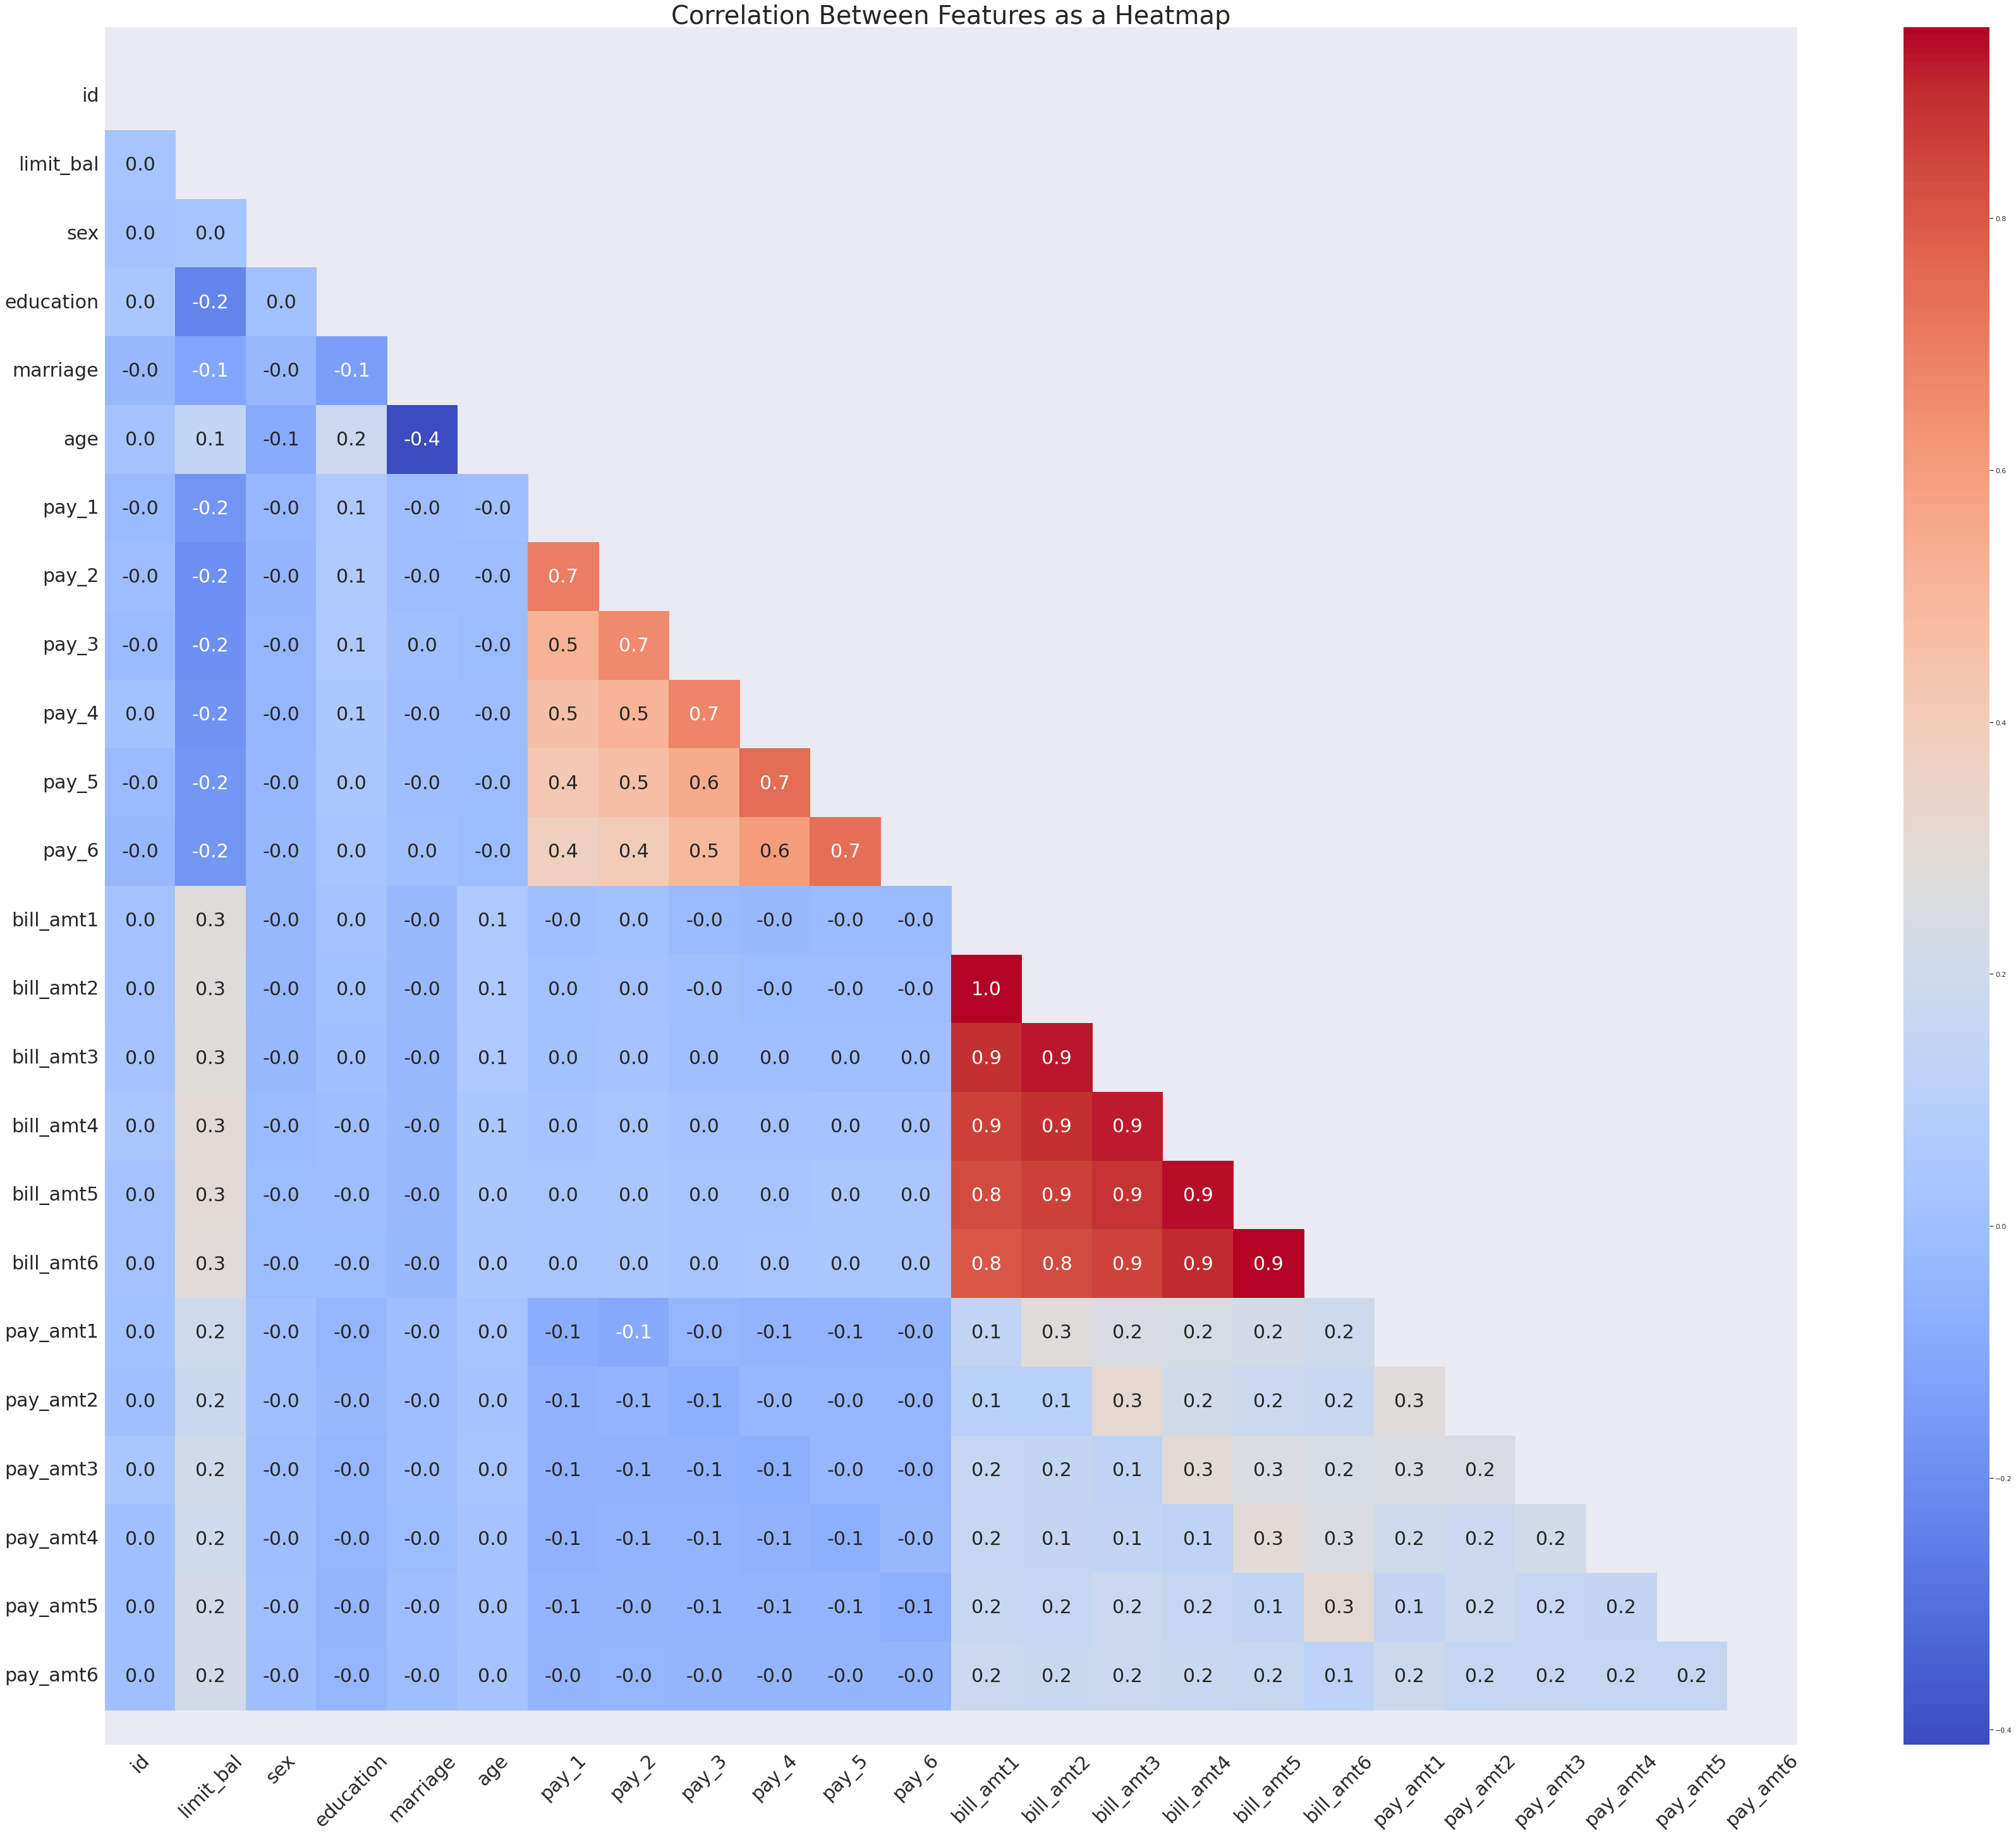

In [24]:
corr = cc_df.iloc[:, :24].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))

# Plot the heatmap
g = sns.heatmap(data=corr, annot=True, ax=ax, cmap='coolwarm',
            cbar=True, fmt='.1f',
                mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":30},  #Annotation size
               );


# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=30) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=45);


plt.title('Correlation Between Features as a Heatmap', size=40);

**Comment:-**
What stands out are the high correlation among the payment history features and the bill amount features. I will keep this in mind as I build my models.

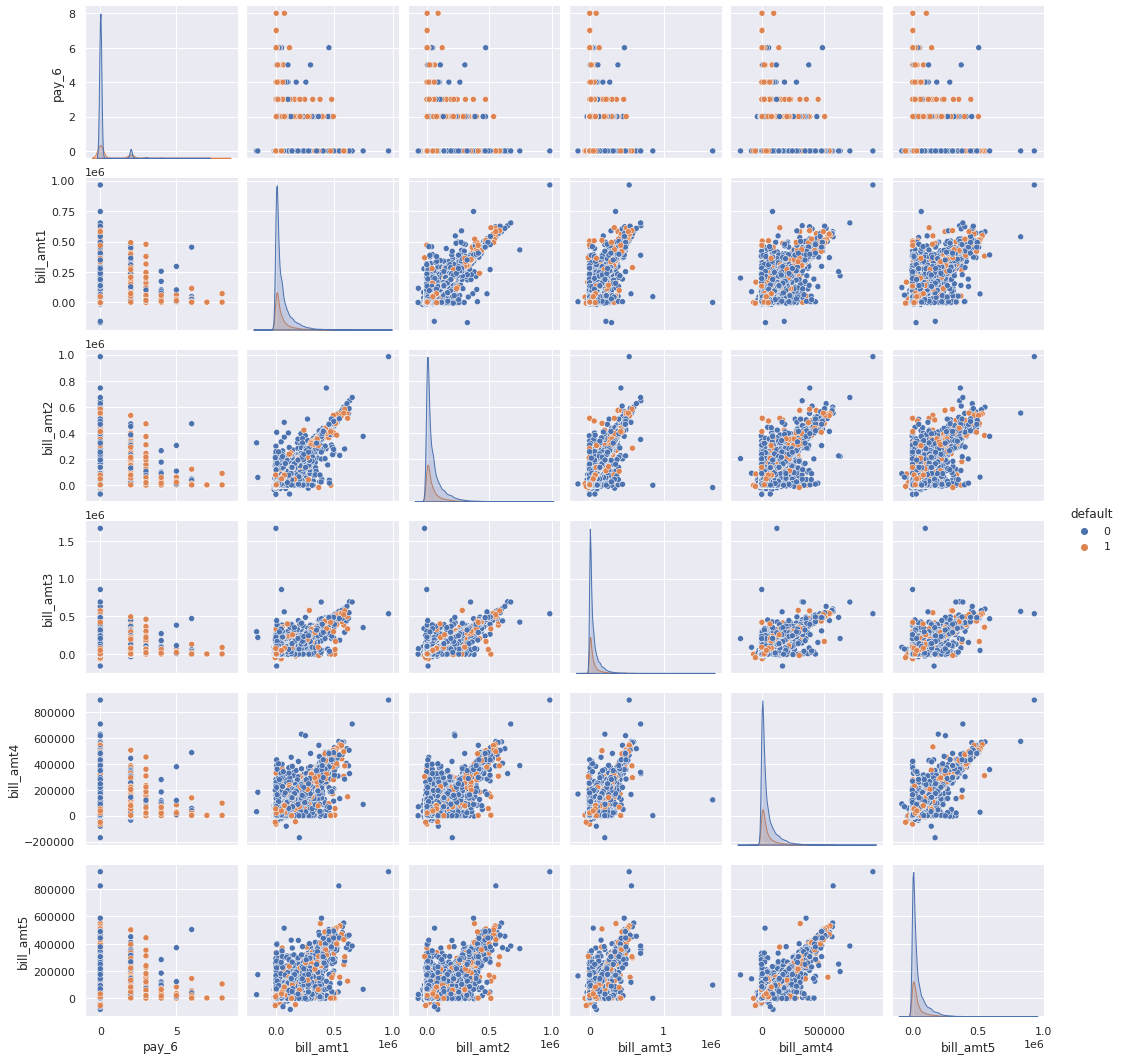

In [25]:
# Plotting the bill amount density plots and their scatter plots
sns.pairplot(cc_df, vars=cc_df.columns[11:17], kind='scatter',hue= 'default')

**Comment:-**
The distribution of the bill amounts are skewed. If the model assumptions require symmetric/normal distributions, a log transformation or a Box-Cox transformation might be warranted.

I will be using a `MinMaxScaler` later to scale the data given the presence of a lot of outliers.

# **Statistical Inference**

## Is Default Affected by Gender?

Does gender affect the default rate? I will try to answer this question with a hypothesis test. As is customary, I'll use a significance level of $\alpha = 0.05$. Then the bounds of the confidence interval are given by
$[\frac{\alpha}{2}, 1 - \frac{\alpha}{2}] = [.025, .975]$.

In [26]:
alpha = 0.05
lb, ub = (alpha / 2), 1 - (alpha / 2)
ci_bounds = [lb, ub]

I want to test whether the proportion $p_m$ of men defaulting is the same as the proportion $p_w$ of women defaulting. Hence, my test statistic is the difference between $p_m$ and $p_w$.

I state the null and alternate hypotheses:  
- $H_0: p_m = p_w$.
- $H_a: p_m \neq p_w$.

In [27]:
ttest, pval = stats.ttest_ind(cc_df[cc_df['sex'] == 1]['default'], cc_df[cc_df['sex'] == 2]['default'], equal_var=False)

In [28]:
print(pval)
if pval < 0.05:
    print("The null hypothesis is rejected.")
else:
    print("The null hypothesis is accepted.")

7.562495588453789e-12
The null hypothesis is rejected.


**Comment:-**
Based on the results, the null hypothesis that $p_m = p_w$ is rejected.

# **Feature Engineering**

## Adding New Features<br>

Based on my understanding of the data and conclusions from EDA, I engineer a few features.

In [29]:
cc_df['avg_default'] = cc_df.iloc[:, 5:11].sum(axis=1) / 6 # average default history
cc_df['avg_bill_amt'] = cc_df.iloc[:, 11:17].sum(axis=1) / 6 # average bill amount
cc_df['avg_pay_amt'] = cc_df.iloc[:, 18:24].sum(axis=1) / 6 # average payment amount
# There is some division by 0 in the following step. If I used this feature, I would need to address the situation.
cc_df['pay_bill_rat'] = cc_df['avg_pay_amt']/cc_df['avg_bill_amt'] # average payment to average bill ratio
cc_df['bill_bal_rat'] = cc_df['avg_bill_amt'] / cc_df['limit_bal'] # average bill amount to credit limit ratio
cc_df['pay_bal_rat'] = cc_df['avg_pay_amt'] / cc_df['limit_bal'] # average payment amount to credit limit ratio

In [30]:
print(cc_df['pay_bill_rat'].isna().sum()) # 0 divided by 0
print(cc_df[cc_df['pay_bill_rat']==np.inf].shape[0]) # non-zero divided by 0

795
171


In [31]:
cc_df.groupby('default')['avg_default'].mean()

default
0    6.041381
1    6.567561
Name: avg_default, dtype: float64

In [32]:
cc_df.groupby('default')['avg_pay_amt'].mean()

default
0    5828.236775
1    3328.215617
Name: avg_pay_amt, dtype: float64

In [33]:
cc_df.groupby('default')['limit_bal'].mean()

default
0    178099.726074
1    130109.656420
Name: limit_bal, dtype: float64

In [34]:
cc_df[cc_df["avg_bill_amt"] != 0].groupby("default")["pay_bill_rat"].mean()

default
0   -0.103404
1    0.305468
Name: pay_bill_rat, dtype: float64

In [35]:
cc_df.groupby('default')['bill_bal_rat'].mean()

default
0    0.302078
1    0.382880
Name: bill_bal_rat, dtype: float64

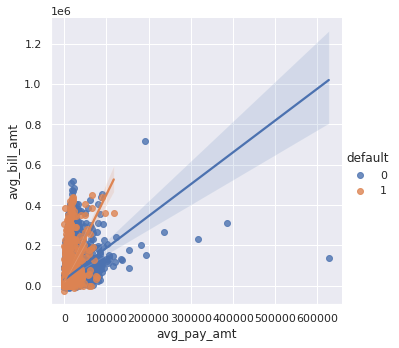

In [36]:
sns.lmplot('avg_pay_amt', 'avg_bill_amt', cc_df, hue='default')
fig = plt.gcf()
plt.show()

**Comment:-**
If I were to use some dimension reduction like Non-negative Matrix Factorisation (it's superior to PCA because it gives interpretable "principal coordinates") which require non-negative values, I would consider dropping these values or reassigning them to 0 since they are a small percentage of the dataset. Since I will not have time for that, I will leave those values as they are.

I engineer some more features that will be used in the models.

In [37]:
usage_labels = ['usage' + str(i) for i in range(1,7)]
pay_labels = ['pay_amt' + str(i) for i in range(1,7)]

# usagei denotes the portion of credit limit paid in month i
for i in range(0,6):
    cc_df[usage_labels[i]] = cc_df[pay_labels[i]] / cc_df['limit_bal']

zero_bal_labels = ['zero_bal' + str(i) for i in range(1,7)]
bill_labels = ['bill_amt' + str(i) for i in range(1,7)]

# zero_bali denotes the ratio of outstanding bill to credit limit
for i in range(0,6):
    cc_df[zero_bal_labels[i]] = (cc_df[bill_labels[i]] - cc_df[pay_labels[i]]) / cc_df['limit_bal']

In [38]:
cc_df[cc_df['avg_bill_amt'] > cc_df['limit_bal']]['default'].value_counts()

0    90
1    41
Name: default, dtype: int64

I notice that about one third of the people whose average bill amount was more than the credit limit defaulted. As a result, I engineer a feature called `overdraft` which takes value 1 if the user defaulted at any point in the past 6 months.

In [39]:
cc_df['overdraft'] = np.where(
    (cc_df['bill_amt1'] > cc_df['limit_bal']) |
    (cc_df['bill_amt2'] > cc_df['limit_bal']) |
    (cc_df['bill_amt3'] > cc_df['limit_bal']) |
    (cc_df['bill_amt4'] > cc_df['limit_bal']) |
    (cc_df['bill_amt5'] > cc_df['limit_bal']) |
    (cc_df['bill_amt6'] > cc_df['limit_bal']), 1, 0
)

In [40]:
cc_df[cc_df['overdraft'] == 1]['default'].value_counts()

0    2748
1    1183
Name: default, dtype: int64

The original dataset had three categorical demographic variables (`sex`, `marriage` and `education`). Among them `education` has an ordinal structure as the changes in value lead to more or less education. `sex` had only two classes and so is already one-hot-encoded. I will now one-hot-encode the `marriage` variable.

<a id='e-cat'></a>
## Encoding Categorical Data<br>

In [41]:
# One-Hot_encoding the marriage column and dropping the first column
j = cc_df.columns.get_loc("marriage")

left = cc_df.iloc[:, :j]
marriage = pd.get_dummies(cc_df["marriage"], prefix="marriage", drop_first=True)
right = cc_df.iloc[:, j + 1 :]

cc_df = pd.concat([left, marriage, right], axis=1)

# **Machine Learning: Classification Models**

<a id='f-sel'></a>
## Feature Selection, Scaling, Splitting and Balancing the Data<br>

In [42]:
def make_stratified_tts(df, features, target='default', scaled=False, balanced=False, test_size=0.2, random_state=1):
    '''
    This function takes in a dataframe, the feature variables, the target variables
    and then splits the data with the user having the option to scale and balance the data
    and set values for the split proportion and the random seed.
    '''
    # Resampling methods
    random_os = RandomOverSampler() # oversampling
    smote = SMOTE() # smote

    X, y = df[features], df[target]

    # Checking if X needs to be scaled
    if scaled == True:
        X_sc = pd.DataFrame(MinMaxScaler().fit_transform(X), columns=X.columns)
    else:
        X_sc = X
    
    # Executing sklearn's train-test split
    X_sc_train, X_sc_test, y_train, y_test = tts(
    X_sc, y, test_size=test_size, stratify=y, random_state=random_state
    )
    
    # Checking if training data needs to be balanced
    if balanced == 'random_os':
        X_sc_train_rs, y_sc_train_rs = random_os.fit_sample(X_sc_train, y_train)
    elif balanced == 'smote':
        X_sc_train_rs, y_sc_train_rs = smote.fit_sample(X_sc_train, y_train)
    else:
        X_sc_train_rs, y_sc_train_rs = X_sc_train, y_train        
        
    return X_sc_train_rs, X_sc_test, y_sc_train_rs, y_test

This is the original data set, along with some minor data adjustments discussed earlier and the one-hot encoding of the marriage feature.

In [43]:
features_1 = list(cc_df.columns[:24])
X1_train, X1_test, y_train, y_test = make_stratified_tts(cc_df, features_1)
print(features_1)
X1 = cc_df[features_1]

['id', 'limit_bal', 'sex', 'education', 'marriage_2', 'marriage_3', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5']


This dataset contains features that avoid multicollinearity in the model (and hence, statistically significant non-zero coefficients in a logistic model). I decide on this list by looking at the vif and deviance reduction and also at the feature importances of the models. The dataset is then scaled and the training set balanced.

In [44]:
features_best = (
    list(cc_df.columns[0:5])
    + list(cc_df.columns[6:12])
    + list(cc_df.columns[18:24])
    + [cc_df.columns[25]]
    + [cc_df.columns[27]]
    + list(cc_df.columns[31: 34])
    + [cc_df.columns[36]]
    + list(cc_df.columns[38: 40])
    + [cc_df.columns[42]]
)

X3_sc_train_rs1, X3_sc_test, y3_sc_train_rs1, y_test = make_stratified_tts(cc_df, features_best, scaled=True, balanced='SMOTE')
X3_sc_train_rs2, X3_sc_test, y3_sc_train_rs2, y_test = make_stratified_tts(cc_df, features_best, scaled=True, balanced='RandomOverSample')
print(features_best)
X3 = cc_df[features_best]

['id', 'limit_bal', 'sex', 'education', 'marriage_2', 'age', 'pay_1', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'default', 'avg_default', 'bill_bal_rat', 'pay_bal_rat', 'usage1', 'usage4', 'usage6', 'zero_bal1', 'zero_bal4']


In [45]:
def plot_feat_imp(X_train, model):
    """
    Prints the model feature importances
    """
    feat_imp = pd.DataFrame(
        {"Feature": X_train.columns, "Feature Importance": model.feature_importances_}
    )
    feat_imp.sort_values(by="Feature Importance", ascending=False, inplace=True)
    plt.figure(figsize=(10, 5))
    plt.title(f"Feature Importance of {model}", fontsize=14)
    ax = sns.barplot(x="Feature", y="Feature Importance", data=feat_imp)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()
    
def get_model_results(X_train, X_test, y_train, y_test, model, feat_imp=False):
    """
    Prints the training and test metrics and plots the confusion matrices.
    Also plots the feature importance based on the user choosing the parameter variable,
    and returns the evaluation metrics.
    """
    # Fit training model to training set
    model.fit(X_train, y_train)

    # Obtain the predicted values and probabilities from the model
    y_train_pred = model.predict(X_train)
    y_train_pred_probs = model.predict_proba(X_train)

    y_test_pred = model.predict(X_test)
    y_test_pred_probs = model.predict_proba(X_test)

    # Get confusion matrix
    train_matrix = metrics.confusion_matrix(y_train, y_train_pred)
    test_matrix = metrics.confusion_matrix(y_test, y_test_pred)

    # Get F1 score
    f1_train = metrics.f1_score(y_train, y_train_pred)
    f1_test = metrics.f1_score(y_test, y_test_pred)

    # Print the train and test roc_auc_score
    #and test confusion matrix
    print(
        f"ROC_AUC_Score of train set is {metrics.roc_auc_score(y_train, y_train_pred_probs[:, 1])}."
    )
    print(
        f"ROC_AUC_Score of test set is {metrics.roc_auc_score(y_test, y_test_pred_probs[:, 1])}."
    )
    #print("Confusion matrix of test set\n", confusion_matrix(y_test, y_test_pred))
    #print(
    #    "Classification Report of test set\n",
    #    metrics.classification_report(y_test, y_test_pred),
    #)
    
    # Display scores
    print(f"F1 of train set is {f1_train.round(4)}.")
    print(f"F1 of test set is {f1_test.round(4)}.")

    # Plot training and test confusion matrices
    plt.figure(figsize=(12, 4))
    names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    train_percent = [
        "{0:.2%}".format(value)
        for value in train_matrix.flatten() / np.sum(train_matrix)
    ]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, train_percent)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.subplot(1, 2, 1)
    sns.heatmap(train_matrix, annot=labels, fmt="", cmap="Blues")
    plt.title("Train Set\n")

    names = ["True Neg", "False Pos", "False Neg", "True Pos"]
    test_percent = [
        "{0:.2%}".format(value) for value in test_matrix.flatten() / np.sum(test_matrix)
    ]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(names, test_percent)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.subplot(1, 2, 2)
    sns.heatmap(test_matrix, annot=labels, fmt="", cmap="Blues")
    plt.title("Test Set\n")

    plt.subplots_adjust(wspace=0.2)

    #plt.figure(figsize=(7, 4))
    #plot_roc_curve(model, X_test, y_test)
    #plt.show()

    if feat_imp == True:
        plot_feat_imp(X_train, model)
    elif feat_imp == "LR":
        # Get feature coefficients
        importance = model.coef_[0]

        df_feat_imp = pd.DataFrame(
            columns=["Feature", "Feature Importance (Value of Coefficient)"]
        )
        
        # Attach feature coefficients to labels
        for i, v in enumerate(importance):
            df_feat_imp = df_feat_imp.append(
                {
                    "Feature": X_train.columns[i],
                    "Feature Importance (Value of Coefficient)": v,
                },
                ignore_index=True,
            )

            #print(f"{X_train.columns[i]} Feature: %0d, Score: %.5f" % (i, v))
        
        # Sort them by their absolute values in descending order
        df_feat_imp = df_feat_imp.reindex(
            df_feat_imp["Feature Importance (Value of Coefficient)"]
            .abs()
            .sort_values(ascending=False)
            .index
        )
        
        # Plot a bargraph
        plt.figure(figsize=(10, 5))
        plt.title(f"Feature Importance of {model}", fontsize=14)
        ax = sns.barplot(x="Feature", y="Feature Importance (Value of Coefficient)", data=df_feat_imp)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        plt.show()
        
    else:
        pass
    
    return metrics.accuracy_score(y_test, y_test_pred),\
           metrics.precision_score(y_test, y_test_pred),\
           metrics.recall_score(y_test, y_test_pred),\
           metrics.f1_score(y_test, y_test_pred),\
           metrics.roc_auc_score(y_test, y_test_pred_probs[:, 1])

<a id='vif'></a>
## VIF and Deviance Reduction for Feature Selection (in Logistic Regression)<br>

I use the variance inflation factor and reduction of model deviance to quantitatively look at the multicollinearity of features. I will use the commonly considered threshold of 2.5, i.e., if a feature has vif greater than 2.5., it exhibits strong multicollinearity with the other features which leads to the inflation of standard errors, leading to the coefficients' (being non-zero) not being statistically significant.

In [46]:
# Get variables for which to compute VIF and add intercept term
X1['intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X1.columns
vif["VIF"] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]

vif.sort_values(by='VIF', ascending=False)

,variables,VIF
24,intercept,51.006261
14,bill_amt2,25.783701
17,bill_amt5,24.700718
15,bill_amt3,21.737431
16,bill_amt4,20.340628
18,bill_amt6,14.334871
13,bill_amt1,13.934505
11,pay_5,3.252982
10,pay_4,2.978999
8,pay_2,2.621039


**Comment:-**
We noticed earlier and the vif scores reinforce that the bill amount variables are highly correlated. I will later notice that they are not among the important features either making them good candidate features to be dropped.

In [47]:
X3 = cc_df[features_best]
# Get variables for which to compute VIF and add intercept term
X3['intercept'] = 1

# Compute and view VIF
vif = pd.DataFrame()
vif["variables"] = X3.columns
vif["VIF"] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]

vif.sort_values(by='VIF', ascending=False)

,variables,VIF
9,pay_4,inf
6,pay_1,inf
10,pay_5,inf
8,pay_3,inf
7,pay_2,inf
18,avg_default,inf
5,age,inf
26,intercept,56.158715
19,bill_bal_rat,53.739107
25,zero_bal4,19.776182


**Comment:-**
The collinearity of the variables has been reduced when we look at our best features.

In [48]:
# Define model formula
formula1 = "default ~ limit_bal + sex + education + marriage_2 + marriage_3 + age + pay_1 + pay_2 + pay_3 + pay_4\
            + pay_5 + pay_6 + bill_amt1 + bill_amt2 + bill_amt3 + bill_amt4 + bill_amt5 + bill_amt6 + pay_amt1 +\
            pay_amt2 + pay_amt3 + pay_amt4 + pay_amt5 + pay_amt6"

# Fit GLM
model_glm = glm(formula1, data=cc_df, family=sm.families.Binomial()).fit()

# Compare the reduction of deviance in current model from null model and print it
diff_deviance = model_glm.null_deviance - model_glm.deviance
print("The reduction in model deviance for this model is:", diff_deviance)

# Print the model summary
model_glm.summary()

The reduction in model deviance for this model is: 5003.059679279915


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                30000
Model:                            GLM   Df Residuals:                    29975
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13351.
Date:                Sun, 07 Aug 2022   Deviance:                       26702.
Time:                        10:13:31   Pearson chi2:                 5.32e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2357      0.107    -11.528      0.000      -1.446      -1.026
limit_bal  -1.505e-06   1.55e-07     -9.712      0.000   -1.81e-06    -1.2e-06
sex           -0.1263      0.032     -3.979      0.000      -0.188      -0.064
education     -0.0767      0.023     -3.400      0.001      -0.121      -0.033
marriage_2    -0.1752      0.036     -4.916      0.000      -0.245      -0.105
marriage_3    -0.1317      0.137     -0.963      0.336      -0.400       0.136
age            0.0048      0.002      2.492      0.013       0.001       0.008
pay_1          0.8836      0.025     35.193      0.000       0.834       0.933
pay_2          0.0449      0.027      1.692      0.091      -0.007       0.097
pay_3          0.1250      0.028      4.399      0.000       0.069       0.181
pay_4          0.0765      0.032      2.416      0.016       0.014       0.139
pay_5          0.0936      0.034      2.735      0.006       0.027       0.161
pay_6          0.1584      0.029      5.455      0.000       0.102       0.215
bill_amt1  -2.322e-06   1.07e-06     -2.176      0.030   -4.41e-06   -2.31e-07
bill_amt2   2.383e-06   1.43e-06      1.669      0.095   -4.15e-07    5.18e-06
bill_amt3   1.676e-06   1.28e-06      1.309      0.190   -8.33e-07    4.18e-06
bill_amt4    -8.3e-08    1.3e-06     -0.064      0.949   -2.64e-06    2.47e-06
bill_amt5  -5.829e-07    1.5e-06     -0.389      0.698   -3.52e-06    2.36e-06
bill_amt6  -1.195e-07    1.2e-06     -0.100      0.920   -2.47e-06    2.23e-06
pay_amt1   -1.179e-05   2.24e-06     -5.252      0.000   -1.62e-05   -7.39e-06
pay_amt2   -8.673e-06   2.05e-06     -4.230      0.000   -1.27e-05   -4.65e-06
pay_amt3   -1.779e-06   1.66e-06     -1.070      0.285   -5.04e-06    1.48e-06
pay_amt4   -2.901e-06   1.76e-06     -1.647      0.100   -6.35e-06    5.52e-07
pay_amt5   -2.919e-06   1.78e-06     -1.641      0.101   -6.41e-06    5.68e-07
pay_amt6   -2.757e-06   1.34e-06     -2.060      0.039   -5.38e-06   -1.34e-07
==============================================================================
"""

**Comment:-**
I notice that not all of these coefficients are non-zero in a statistically significant way. I will use this information along with the feature importances to finalise my best features. However, this will be something to come back to after an initial round of modelling.

In [49]:
# Define model formula
formula2 = "default ~ limit_bal + sex + education + marriage_2 + marriage_3 + pay_1 + pay_2 + pay_3 + pay_4\
            + pay_5 + pay_6 + pay_amt1 + pay_amt2 + pay_amt3 + pay_amt4 + pay_amt5 + pay_amt6 + age_group +\
            avg_bill_amt + pay_bal_rat + usage1 + usage2 + usage5 + zero_bal1 + zero_bal2 + zero_bal5"

# Fit GLM
model_glm = glm(formula2, data=cc_df, family=sm.families.Binomial()).fit()

# Compare the reduction of deviance in current model from null model and print it
diff_deviance = model_glm.null_deviance - model_glm.deviance
print("The reduction in model deviance for this model is:", diff_deviance)

# Print the model summary
model_glm.summary()

The reduction in model deviance for this model is: 5018.847828214137


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                default   No. Observations:                30000
Model:                            GLM   Df Residuals:                    29973
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13343.
Date:                Sun, 07 Aug 2022   Deviance:                       26687.
Time:                        10:13:32   Pearson chi2:                 5.31e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -1.1526      0.106    -10.922      0.000      -1.359      -0.946
limit_bal     -1.71e-06   2.09e-07     -8.179      0.000   -2.12e-06    -1.3e-06
sex             -0.1279      0.032     -4.024      0.000      -0.190      -0.066
education       -0.0746      0.023     -3.303      0.001      -0.119      -0.030
marriage_2      -0.1758      0.035     -4.967      0.000      -0.245      -0.106
marriage_3      -0.1221      0.137     -0.892      0.372      -0.390       0.146
pay_1            0.8811      0.025     35.130      0.000       0.832       0.930
pay_2            0.0609      0.027      2.271      0.023       0.008       0.114
pay_3            0.1066      0.029      3.688      0.000       0.050       0.163
pay_4            0.0850      0.032      2.662      0.008       0.022       0.148
pay_5            0.0919      0.034      2.684      0.007       0.025       0.159
pay_6            0.1578      0.029      5.401      0.000       0.101       0.215
pay_amt1     -1.583e-05   2.95e-06     -5.364      0.000   -2.16e-05      -1e-05
pay_amt2      -4.64e-06   2.34e-06     -1.987      0.047   -9.22e-06   -6.29e-08
pay_amt3     -2.822e-06    1.6e-06     -1.760      0.078   -5.96e-06     3.2e-07
pay_amt4     -3.588e-06   1.75e-06     -2.055      0.040   -7.01e-06   -1.65e-07
pay_amt5     -1.899e-06   2.08e-06     -0.911      0.362   -5.98e-06    2.19e-06
pay_amt6     -3.065e-06   1.49e-06     -2.058      0.040   -5.98e-06   -1.46e-07
age_group        0.0449      0.018      2.503      0.012       0.010       0.080
avg_bill_amt  1.902e-06    5.2e-07      3.659      0.000    8.83e-07    2.92e-06
pay_bal_rat      0.3557      0.794      0.448      0.654      -1.201       1.912
usage1           0.0955      0.380      0.251      0.802      -0.649       0.841
usage2          -0.2182      0.363     -0.600      0.548      -0.930       0.494
usage5          -0.3616      0.340     -1.063      0.288      -1.028       0.305
zero_bal1       -0.3791      0.129     -2.929      0.003      -0.633      -0.125
zero_bal2        0.3551      0.141      2.517      0.012       0.079       0.632
zero_bal5       -0.0954      0.079     -1.205      0.228      -0.251       0.060
================================================================================
"""

<a id='lr'></a>
## Logistic Regression Model<br>

ROC_AUC_Score of train set is 0.6464811697699576.
ROC_AUC_Score of test set is 0.6460442075247969.
F1 of train set is 0.0.
F1 of test set is 0.0.


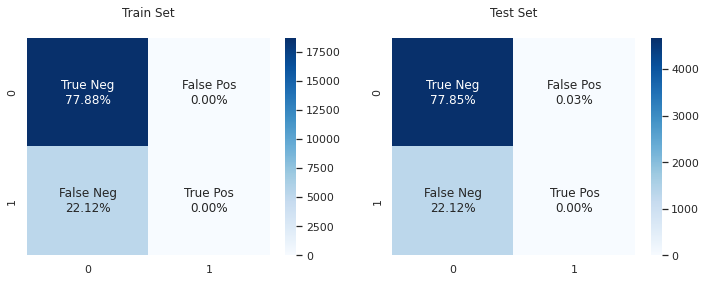

In [50]:
# Instantiate a Logistic Regression model
log_model = LogisticRegression(random_state=0, max_iter=200)

# Train the model on the original data set and diplay the performance
acc, prec, rec, f1, auc = get_model_results(X1_train, X1_test, y_train, y_test, log_model)

**Comment:-**
It is not surprising that the model is performing so poorly as it is classifying everything as non-default. Let's see if the performance improves as we wrangle the dataset.

In [51]:
# Storing model results in a dataframe for comparison
model_results = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"])

model = pd.DataFrame(
    [["Logistic Regression (original data)", acc, prec, rec, f1, auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)


This is a Logistic Regression modelled on the best features dataset. The feature importances here will justify/reinforce some of the choices I have made.

ROC_AUC_Score of train set is 1.0.
ROC_AUC_Score of test set is 1.0.
F1 of train set is 1.0.
F1 of test set is 1.0.


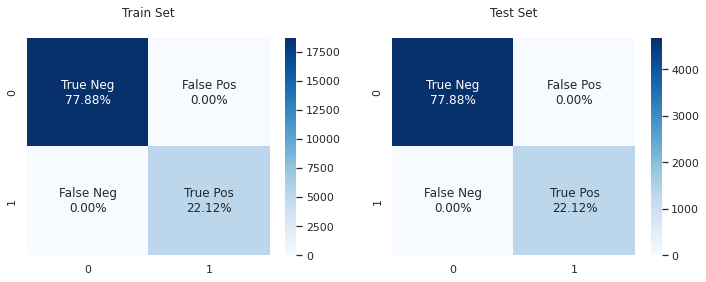

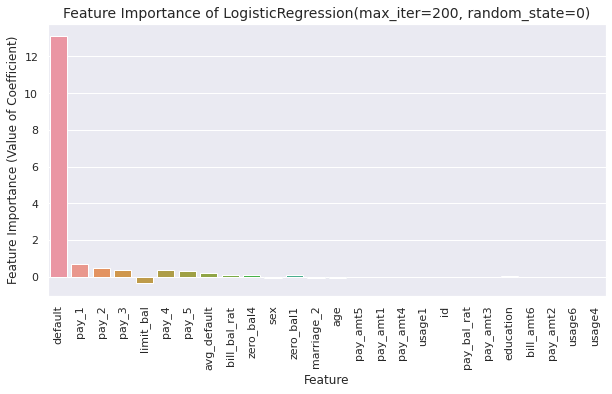

In [52]:
# Train the model on the scaled, resampled data set of the best features and diplay the performance
acc, prec, rec, f1, auc = get_model_results(X3_sc_train_rs2, X3_sc_test, y3_sc_train_rs2, y_test, log_model, feat_imp='LR')

**Comment:-**
The model is performing markedly better. Further, the most important features include the payment history and some of the engineered features like usage, zero balance and the credit limit. This agrees with our intuition and the insights I had drawn from EDA.

In [53]:
# Updating model results dataframe

model = pd.DataFrame(
    [["Logistic Regression (engineered data)", acc, prec, rec, f1, auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

<a id='xgb'></a>
## Gradient Boosting Classifier<br>

ROC_AUC_Score of train set is 1.0.
ROC_AUC_Score of test set is 1.0.
F1 of train set is 1.0.
F1 of test set is 1.0.


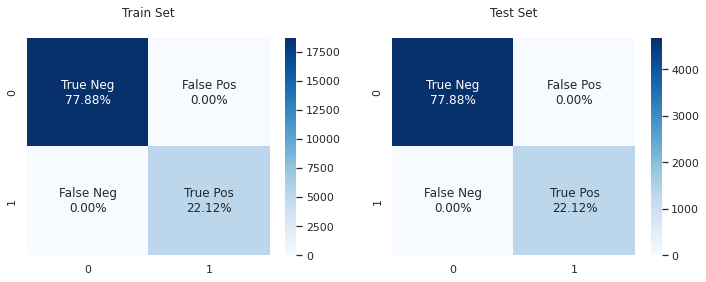

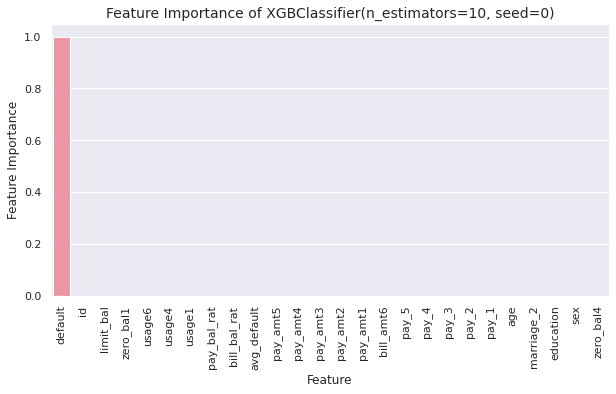

In [54]:
# Instantiating an XGBoost classifier.
xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=10, seed=0)

acc, prec, rec, f1, auc = get_model_results(X3_sc_train_rs2, X3_sc_test, y3_sc_train_rs2, y_test, xgb_model, feat_imp=True)

The XGBoost model has lower false negatives than the tuned Random Forest but it has a bit higher false positives. This is a reflection of how important it is to have thresholds so that the bank can balance potential losses with potential revenue from new customers. I also talk later about how the model can be used in ways beyond "just" a classifier; it can be used to make informed recommendations.

In [55]:
# Updating model results dataframe

model = pd.DataFrame(
    [["Gradient Boosting Classifier", acc, prec, rec, f1, auc]],
    columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "AUC_ROC"],
)
model_results = model_results.append(model, ignore_index=True)

I tune a few hyperparameters but if I had more time, I would set up a pipeline so that all the processes can be covered in one step. I would start with a couple of `RandomizedSearch` results (to avoid the huge expensive costs of a GridSearch on the whole parameter grid) and use those as a starting point for smaller, more efficient grids which can be exhaustively covered by `GridSearch.

In [56]:
xgb_model = xgb.XGBClassifier()

# Create the parameter grid
xgb_param_grid = {
    'clf__learning_rate': np.arange(.05, 1, .05),
    'clf__max_depth': np.arange(3, 10, 1),
    'clf__n_estimators': np.arange(50, 200, 50)
}

# Perform RandomizedSearchCV
randomised_xgb = RandomizedSearchCV(estimator=xgb_model, n_iter=2, scoring='roc_auc', verbose=1,
                                        cv=2, param_distributions=xgb_param_grid)

# Fit the estimator
randomised_xgb.fit(X3_sc_train_rs1, y3_sc_train_rs1)

# Compute metrics
#print(randomized_roc_auc.best_score_)
print(randomised_xgb.best_estimator_)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
XGBClassifier(clf__learning_rate=0.45, clf__max_depth=5, clf__n_estimators=50)


ROC_AUC_Score of train set is 1.0.
ROC_AUC_Score of test set is 1.0.
F1 of train set is 1.0.
F1 of test set is 1.0.


(1.0, 1.0, 1.0, 1.0, 1.0)

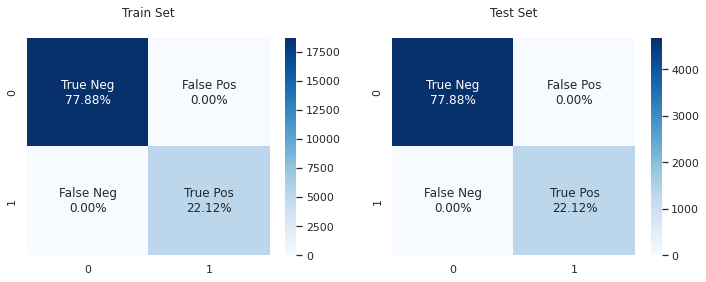

In [57]:
get_model_results(X3_sc_train_rs1, X3_sc_test, y3_sc_train_rs1, y_test, xgb_model)

I tried tuning the regularisation parameter and tuning the model by using the `class_weight` parameter but performance remained about the same.

**Comment:-**
There is a greater reduction in model deviance and except for a couple of the variables, the coefficients are non-zero with high statistical significance.